## Ambiente Inicial

In [1]:
# librerias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
script = os.getcwd()
file = os.path.join(script, "data", "BD_IncendiosSNIF_2015-2023.csv")
df = pd.read_csv(file, encoding="latin-1")

C:\Users\Franc\AppData\Local\Temp\ipykernel_14944\4104928706.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding="latin-1")


In [3]:
df.sample(3)

,Año,Latitud,Longitud,Estado,Municipio,Región,Predio,Fecha Inicio,Fecha Termino,Duración días,...,Renuevo,Arbustivo,Herbáceo,Hojarasca,Total hectáreas,Tamaño,Detección,Llegada,Duración,Causa
46865,2021,28.645025,-107.786372,Chihuahua,Guerrero,Norte,Ej. San Miguel de Ortiz,15/05/2021,16/05/2021,2 a 3 Días,...,0,3.0,5.0,8.23,16.23,11 a 20 Hectáreas,0.020833333,0.020833333,0.375,Naturales
2883,2015,19.736111,-98.829167,México,San Martín de las Pirámides,Centro,Ejido Santa Maria Palapa,18/05/2015,18/05/2015,1 Día,...,0.0,1.0,1.0,0.00,2.00,0 a 5 Hectáreas,0.020833333,0.020833333,0.270833333,Desconocidas
41245,2021,19.562472,-101.355167,Michoacán,Morelia,Occidente,Ejido Tiripetio/La Estacion,06/02/2021,06/02/2021,1 Día,...,0,0.0,64.0,0.00,64.00,51 a 100 Hectáreas,0.020833333,0.041666667,0.270833333,Desconocidas


## Exploración de datos y limpieza

Comenzaremos por eliminar aquellos espacios en blanco y cambiarlos por "0" para tratarlos después.

In [4]:
df.replace(" ", 0, inplace=True)
df["Renuevo"] = df["Renuevo"].astype(float) 

Ahora corrobaremos que nuestros datos hayan sido leídos correctamente y tengamos los tipos de datos correctos

In [5]:
# Observamos las descripciones estadísticas de nuestras variables númericas
df.describe()

,Año,Latitud,Longitud,Arbolado Adulto,Renuevo,Arbustivo,Herbáceo,Hojarasca,Total hectáreas
count,62441.000000,62441.000000,62441.000000,54758.000000,61506.000000,61918.000000,62002.00000,62141.000000,62441.00000
mean,2019.131324,20.597185,-100.816937,2.204616,1.738875,19.018733,30.34795,23.741466,80.52891
std,2.494713,3.206582,4.395817,40.889945,19.549905,187.361226,267.26755,167.638854,515.37220
min,2015.000000,14.696064,-118.286697,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,2017.000000,19.119222,-103.558372,0.000000,0.000000,0.000000,0.00000,0.000000,1.50000
50%,2019.000000,19.552250,-99.927250,0.000000,0.000000,0.500000,1.00000,0.000000,5.00000
75%,2021.000000,20.892500,-98.712803,0.000000,0.000000,4.000000,6.00000,3.590000,23.65000
max,2023.000000,32.599875,-86.798778,4893.000000,1271.710000,17382.420000,17220.15000,8717.330000,23809.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62441 entries, 0 to 62440
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               62441 non-null  int64  
 1   Latitud           62441 non-null  float64
 2   Longitud          62441 non-null  float64
 3   Estado            62441 non-null  object 
 4   Municipio         62441 non-null  object 
 5   Región            62441 non-null  object 
 6   Predio            62441 non-null  object 
 7   Fecha Inicio      62438 non-null  object 
 8   Fecha Termino     62441 non-null  object 
 9   Duración días     62440 non-null  object 
 10  Tipo de incendio  62441 non-null  object 
 11  Tipo Vegetación   62441 non-null  object 
 12  Régimen de fuego  62441 non-null  object 
 13  Tipo impacto      62441 non-null  object 
 14  Arbolado Adulto   54758 non-null  float64
 15  Renuevo           61506 non-null  float64
 16  Arbustivo         61918 non-null  float6

En esta sección trataremos los valores categoricos para normalizar nuestras respuestas, ya que hay mucha variabilidad entre respuestas.

In [7]:
# Normalización de Columnas con valores categoricos variables
estados = {
    'Ciudad De México':'Ciudad de México',
    'México':'Ciudad de México'
}

df["Estado"] = df["Estado"].replace(estados) 

In [8]:
municipios = { 
    "Alamos":"Álamos",
    "Angel Albino Corzo":"Ángel Albino Corzo"
}
df['Municipio'] = df['Municipio'].replace(municipios)

In [9]:
df["Duración días"] = df["Duración días"].replace("#¡REF!", '0') 

In [10]:
incendios = {
    'superficial':'Superficial',
    'SUPERFICIAL':'Superficial',
    'mixto':'Mixto',
    '0':"Desconocido"
}
df["Tipo de incendio"] = df["Tipo de incendio"].replace(incendios)

In [11]:
vegetacion = {
    '0':"Desconocida",
    "Bosque Mesofilo - BM": "Bosque Mesófilo - BM",
    "Matorral Desertico Micrófilo":"Matorral Desértico Micrófilo",
    "Matorral Desertico Rosetófilo":"Matorral Desértico Rosetófilo",
    "Matorral Sarco-Crasicaule":"Matorral Sarcocrasicaule",
    "Pastizal Gypsófilo":"Pastizal Gipsófilo",
    "Vegetación Halofila Hidrófila":"Vegetación Halófila Hidrófila",
}
df['Tipo Vegetación'] = df['Tipo Vegetación'].replace(vegetacion)

In [12]:
impactos = {'Impacto Mínimo':"Impacto Minimo",
'impacto mínimo':"Impacto Minimo",
'impacto Mínimo':"Impacto Minimo",
'Impacto mínimo':"Impacto Minimo",
'Impacto MÍnImo':"Impacto Minimo",
'impacto moderado':'Impacto Moderado',
'Impacto moderado':'Impacto Moderado',
'impacto severo':'Impacto Severo',
'Impacto severo':'Impacto Severo',
'0':"Impacto Nulo",
}
df["Tipo impacto"] = df["Tipo impacto"].replace(impactos)

In [13]:
df["Tamaño"] = df["Tamaño"].replace({'0':"Desconocido"})

In [14]:
causas = {
    'fumadores':"Fumadores",
    'actividades pecuarias':"Actividades Pecuarias",
    'Actividades pecuarias':"Actividades Pecuarias",
    'cazadores':"Cazadores",
    'actividades ilícitas':"Actividades Ilícitas",
    'Quema de basureros':"Quema de Basureros",
    'Otras actividades productivas':"Otras Actividades Productivas",
    'Residuos de aprovechamiento forestal':"Residuos de Aprovechamiento Forestal",
    'fogatas':"Fogatas",
    'Actividades agrícolas':"Actividades Agrícolas",
    'DESCONOCIDAS':"Desconocidas",
    'Actividades ilícitas': "Actividades Ilícitas"
}
df["Causa"] = df["Causa"].replace(causas) 

Una vez que ya estén normalizadas las respuestas procederemos a limpiar los datos nulos o con valores "0" que asignamos anteriormente.

In [15]:
# Mostramos si existe aunque sea 1 dato nulo en cada columna
df.isnull().any()

Año                 False
Latitud             False
Longitud            False
Estado              False
Municipio           False
Región              False
Predio              False
Fecha Inicio         True
Fecha Termino       False
Duración días        True
Tipo de incendio    False
Tipo Vegetación     False
Régimen de fuego    False
Tipo impacto        False
Arbolado Adulto      True
Renuevo              True
Arbustivo            True
Herbáceo             True
Hojarasca            True
Total hectáreas     False
Tamaño              False
Detección           False
Llegada             False
Duración            False
Causa               False
dtype: bool

Como podemos observar en los resultados obtenidos arriba, tenemos algunas columnas que cuentan con datos nulos, las cuales son: *Fecha Inicio, Duración Días, Arbolado Adulto, Renuevo, Arbustivo, Herbáceo, Hojarasca*. <br>

Para ajustar los valores nulos en las columnas de fechas simplemente se observarán los datos en los registros de "Fecha Termino" y "Duración días", para inferir las fechas faltantes.

In [16]:
# Corrección de valores faltantes en Fechas
df.loc[62438, "Fecha Inicio"] = "27/02/2015"
df.loc[62439, "Fecha Inicio"] = "13/03/2015"
df.loc[62440, "Fecha Inicio"] = "16/03/2015"
# Correción duración de días
df.loc[2064, "Duración días"] = 1

Ahora, las siguientes columnas tiene algo de similar en cuanto a la razón de sus valores nulos, y es que no existe información para rellenar el espacio correspondiente, por lo cual al ser información faltante simplemente se le asignará un 0.

In [17]:
# Corrección de valores faltantes en Arbolados Adultos
df["Arbolado Adulto"] = df["Arbolado Adulto"].fillna(0)
# Corrección de valores faltantes en Renuevo
df["Renuevo"] = df["Renuevo"].fillna(0)
# Corrección de valores faltantes en Arbustivos
df["Arbustivo"] = df["Arbustivo"].fillna(0)
# Corrección de valores en Herbáceos
df["Herbáceo"] = df["Herbáceo"].fillna(0)
# Correción de valores en Hojarascas
df["Hojarasca"] = df["Hojarasca"].fillna(0)

In [18]:
# df["Detección"] = df["Detección"].str.replace(";:", ":")
# df["Llegada"] = df["Llegada"].str.replace(";", ":")
# df["Duración"] = df["Duración"].str.replace(";", ":")
# df["Detección"] = df["Detección"].str.replace(".", "")
# df["Llegada"] = df["Llegada"].str.replace(".", "")
# df["Duración"] = df["Duración"].str.replace(".", "")
# df["Detección"] = df["Detección"].str.replace(" m", "m")
# df["Llegada"] = df["Llegada"].str.replace(" m", "m")
# df["Duración"] = df["Duración"].str.replace(" m", "m")

In [19]:
# df[df["Llegada"].str.contains("pm")]

In [20]:
# def convertir_a_timedelta(tiempo_str):
#     try:
#         # Convertir la cadena a un formato de tiempo datetime
#         tiempo_dt = pd.to_datetime(tiempo_str, format='%I:%M:%S %p')
#     except ValueError:
#         # Intentar un formato diferente si el formato especificado no coincide
#         tiempo_dt = pd.to_datetime(tiempo_str, format='%H:%M:%S')

# columnas = ["Detección", "Llegada", "Duración"]

# for columna in columnas:
#     df[columna] = df[columna].apply(convertir_a_timedelta)

In [21]:
df[["Fecha Inicio", "Fecha Termino"]] = df[["Fecha Inicio", "Fecha Termino"]].apply(pd.to_datetime, format="%d/%m/%Y")

In [22]:
df.sample(3)

,Año,Latitud,Longitud,Estado,Municipio,Región,Predio,Fecha Inicio,Fecha Termino,Duración días,...,Renuevo,Arbustivo,Herbáceo,Hojarasca,Total hectáreas,Tamaño,Detección,Llegada,Duración,Causa
20859,2018,21.287119,-105.184203,Nayarit,Compostela,Occidente,Ejido Ixtapa de la Concepcion,2018-01-31,2018-01-31,1 Día,...,0.0,7.0,3.0,0.0,10.0,6 a 10 Hectáreas,0.020833333,0.055555556,0.145833333,Cazadores
10418,2016,19.622472,-101.464083,Michoacán,Tzintzuntzan,Occidente,P.P Del Puerto Del Tigre,2016-05-20,2016-05-20,1 Día,...,0.0,0.0,1.0,1.0,2.0,0 a 5 Hectáreas,0.010416667,0.024305556,0.722222222,Fumadores
307,2015,19.128028,-99.112639,Ciudad de México,Milpa Alta,Centro,San Salvador Cuauhtenco,2015-02-07,2015-02-07,1 Día,...,0.0,0.0,0.3,0.0,0.3,0 a 5 Hectáreas,0.125,0.75,2.25,Cazadores


Ahora comprobaremos que los datos hayan sido tratados correctamente:

In [23]:
# Mostramos que ya no existan mas valores nulos
df.isnull().any()

Año                 False
Latitud             False
Longitud            False
Estado              False
Municipio           False
Región              False
Predio              False
Fecha Inicio        False
Fecha Termino       False
Duración días       False
Tipo de incendio    False
Tipo Vegetación     False
Régimen de fuego    False
Tipo impacto        False
Arbolado Adulto     False
Renuevo             False
Arbustivo           False
Herbáceo            False
Hojarasca           False
Total hectáreas     False
Tamaño              False
Detección           False
Llegada             False
Duración            False
Causa               False
dtype: bool

Una vez que comprobado que efectivamente no tenemos más datos nulos y que nuestras respuestas categoricas están normalizadas, ahora podemos continuar con nuestro análisis exploratorio.

## Visualizaciones

Para poder observar las relaciones entre nuestros datos, primero observaremos las distribuciones de nuestras variables por tipo.

In [24]:
df.iloc[:,9:]

,Duración días,Tipo de incendio,Tipo Vegetación,Régimen de fuego,Tipo impacto,Arbolado Adulto,Renuevo,Arbustivo,Herbáceo,Hojarasca,Total hectáreas,Tamaño,Detección,Llegada,Duración,Causa
0,2 a 3 Días,Superficial,Bosque de Encino - BQ,Adaptado,Impacto Minimo,0.0,0.0,0.00,0.00,1.5,1.50,0 a 5 Hectáreas,0.006944444,0.024305556,0.291666667,Desconocidas
1,1 Día,Superficial,Pastizal Natural - PN,Adaptado,Impacto Minimo,0.0,0.0,1.50,0.00,0.0,1.50,0 a 5 Hectáreas,0.005555556,0.027777778,0.118055556,Actividades Ilícitas
2,1 Día,Superficial,Desconocida,Otros,Impacto Minimo,0.0,0.0,1.00,0.00,0.0,1.00,0 a 5 Hectáreas,0.003472222,0.010416667,1.013888889,Actividades Ilícitas
3,1 Día,Superficial,Bosque de Pino - BP,Adaptado,Impacto Minimo,0.0,0.0,0.00,0.50,0.0,0.50,0 a 5 Hectáreas,0.004166667,0.017361111,0.070138889,Actividades Pecuarias
4,1 Día,Superficial,Bosque de Pino - BP,Adaptado,Impacto Minimo,0.0,0.0,0.25,0.00,0.0,0.25,0 a 5 Hectáreas,0.013888889,0.024305556,1.083333333,Fumadores
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62436,1 Día,Superficial,Bosque de Pino,Dependiente,Impacto Minimo,0.0,0.0,0.00,0.00,3.0,3.00,0 a 5 Hectáreas,00:30:00,05:00:00,19:00:00,Actividades Pecuarias
62437,1 Día,Superficial,Matorral Crasicaule,Sensible,Impacto Minimo,0.0,0.0,0.00,2.89,0.0,2.89,0 a 5 Hectáreas,00:10:00,02:50:00,11:30:00,Festividades y rituales
62438,0,Superficial,Bosque de Pino - BP,Adaptado,Impacto Minimo,0.0,0.0,0.32,0.48,0.0,0.80,0 a 5 Hectáreas,00:30:00,00:00:00,06:00:00,Actividades Ilícitas
62439,0,Superficial,Bosque de Pino - BP,Adaptado,Impacto Minimo,0.0,0.0,0.50,0.00,0.0,0.50,0 a 5 Hectáreas,00:03:00,00:00:00,04:00:00,Fumadores


In [25]:
categorical_variables = df[["Estado", "Municipio", "Region", "Predio","Tipo de incendio", "Tipo Vegetación", "Régimen de fuego"]]
numerical_variables = df[["Latitud", "Longitud"]]
times_variables = df[["Año", "Fecha Inicio", "Fecha Termino","Duración días"]]

KeyError: "['Region'] not in index"

In [ ]:
categorical_variables.sample(3)

,Estado,Municipio,Región,Predio,Fecha Inicio,Fecha Termino,Duración días,Tipo de incendio,Tipo Vegetación,Régimen de fuego,Tipo impacto,Tamaño,Detección,Llegada,Duración,Causa
7625,Chihuahua,Guadalupe y Calvo,Norte,Ej. Chinatu,11/04/2016,11/04/2016,1 Día,Superficial,Bosque de Pino-Encino - BPQ,Adaptado,Impacto Minimo,0 a 5 Hectáreas,12:05:00 a. m.,12:30:00 a. m.,02:30:00 a. m.,Fogatas
5364,Nayarit,Tepic,Occidente,San Cayetano,03/03/2016,03/03/2016,1 Día,Superficial,Bosque de Encino - BQ,Adaptado,Impacto Minimo,0 a 5 Hectáreas,12:10:00 a. m.,12:18:00 a. m.,03:05:00 a. m.,Actividades Agrícolas
47660,Chihuahua,Guadalupe y Calvo,Norte,P.P. La Muñeca,07/06/2021,07/06/2021,1 Día,Superficial,Bosque de Pino,Adaptado,Impacto Minimo,11 a 20 Hectáreas,12:20:00 a. m.,01:40:00 a. m.,10:30:00 a. m.,Actividades Agrícolas


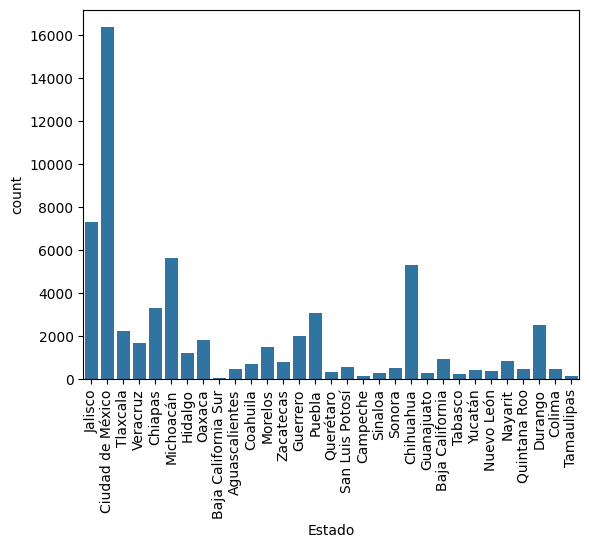

In [ ]:
# fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(16,12))
# ax = ax.flat
# # Palette
# colors = sns.color_palette(palette = 'tab10', n_colors = len(df.columns)+2)

# for i, column in enumerate(categorical_variables.columns):
sns.countplot(x=categorical_variables["Estado"])
plt.xticks(rotation=90)
#fig.delaxes(ax[7])
# plt.tight_layout()
plt.show()

In [ ]:
categorical_variables.columns

Index(['Estado', 'Municipio', 'Región', 'Predio', 'Fecha Inicio',
       'Fecha Termino', 'Duración días', 'Tipo de incendio', 'Tipo Vegetación',
       'Régimen de fuego', 'Tipo impacto', 'Tamaño', 'Detección', 'Llegada',
       'Duración', 'Causa'],
      dtype='object')

C:\Users\Franc\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


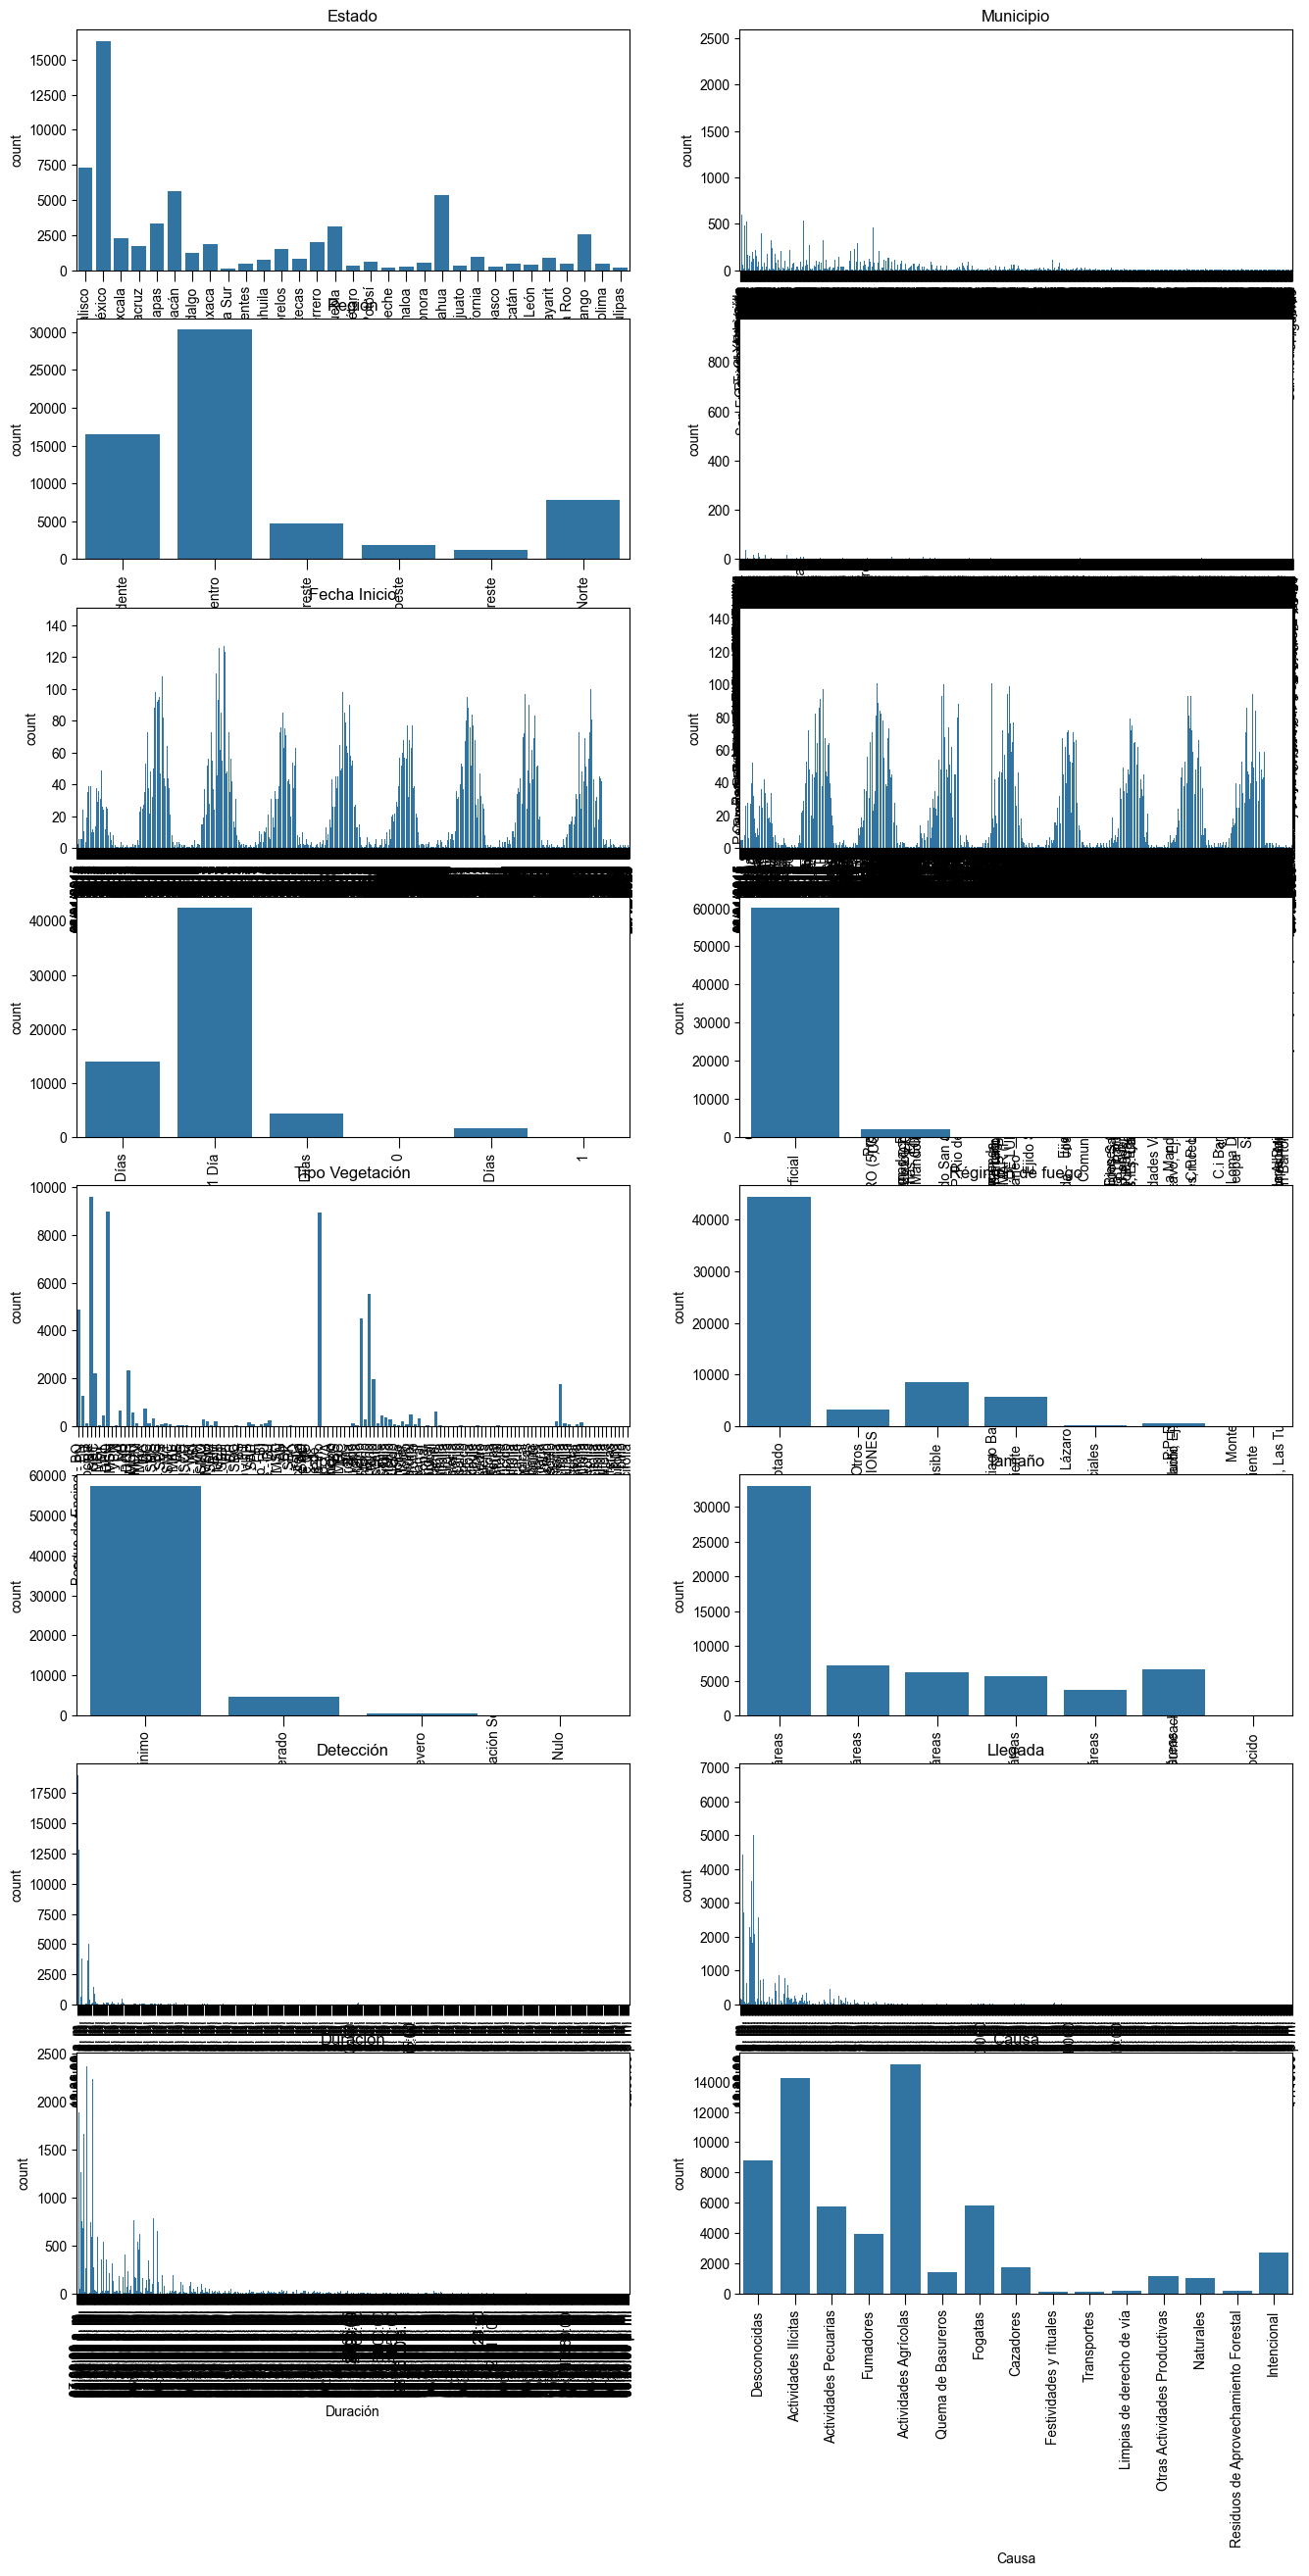

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=8, figsize=(16,30))
ax = ax.flat
for i, column in enumerate(categorical_variables.columns):
    plt.rcParams['font.family'] = 'Arial'
    sns.countplot(x=categorical_variables[column], ax=ax[i])
    ax[i].tick_params(axis='x', rotation=90, size=8)
    ax[i].set_title(column)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62441 entries, 0 to 62440
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Año               62441 non-null  int64         
 1   Latitud           62441 non-null  float64       
 2   Longitud          62441 non-null  float64       
 3   Estado            62441 non-null  object        
 4   Municipio         62441 non-null  object        
 5   Región            62441 non-null  object        
 6   Predio            62441 non-null  object        
 7   Fecha Inicio      62441 non-null  datetime64[ns]
 8   Fecha Termino     62441 non-null  datetime64[ns]
 9   Duración días     62441 non-null  object        
 10  Tipo de incendio  62441 non-null  object        
 11  Tipo Vegetación   62441 non-null  object        
 12  Régimen de fuego  62441 non-null  object        
 13  Tipo impacto      62441 non-null  object        
 14  Arbolado Adulto   6244

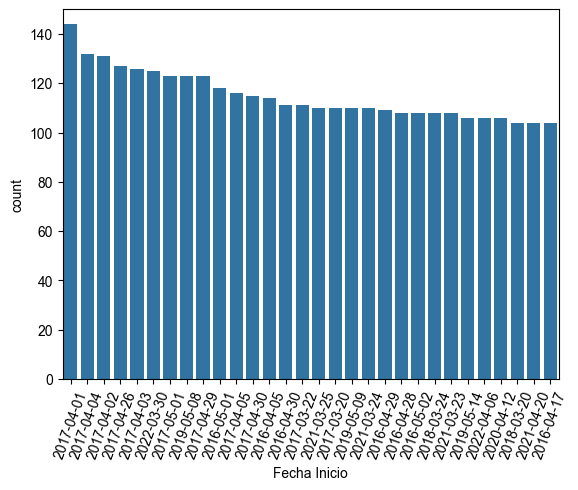

In [ ]:
sns.barplot(df["Fecha Inicio"].value_counts().head(30))
plt.xticks(rotation=70)
plt.ylim(0,150)
plt.show()

In [ ]:
df["Fecha Inicio"].value_counts().head(20)

Fecha Inicio
2017-04-01    144
2017-04-04    132
2017-04-02    131
2017-04-26    127
2017-04-03    126
2022-03-30    125
2017-05-01    123
2019-05-08    123
2017-04-29    123
2016-05-01    118
2017-04-05    116
2017-04-30    115
2016-04-05    114
2016-04-30    111
2017-03-22    111
2021-03-25    110
2017-03-20    110
2019-05-09    110
2021-03-24    110
2016-04-29    109
Name: count, dtype: int64